In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
df['Total'] = df['Total'] / 1000

In [3]:
order1 = ['Wild type', 'Wild type bal', 'L50R', 'L50R bal', 'C56S', 'C56S bal', 'L109R', 'L109R bal', 
         'L50R + L109R', 'C56S + L109R']
order2 = ['Wild type', 'Wild type bal', 'L50R', 'L50R bal', 'C56S', 'C56S bal', 'L109R', 'L109R bal']
order3 = ['Wild type', 'L50R', 'L109R', 'C56S', 'L50R + L109R', 'C56S + L109R']

### Testing

In [4]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df, x='Genotype', y ='Ratio', order=order2)
# sns.barplot(data=df, x='Genotype', y ='Ratio', order=order2, alpha=0.3)

# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')

# # fig.set_size_inches(9, 3)
# fig.tight_layout()

In [5]:
# fig, ax = plt.subplots()
# sns.scatterplot(data=df[df.Genotype.isin(order3)], x='Cytoplasm', y ='Membrane', hue='Genotype')

# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
# fig.tight_layout()

### Membrane affinity

<IPython.core.display.Javascript object>


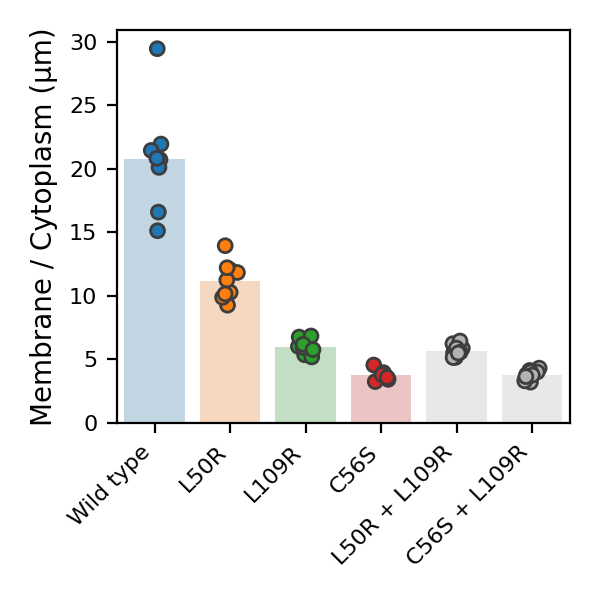

In [6]:
fig, ax = plt.subplots()
palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', '0.7', '0.7']
sns.stripplot(data=df, x='Genotype', y ='Ratio', order=order3, linewidth=1, palette=palette)
sns.barplot(data=df, x='Genotype', y ='Ratio', order=order3, alpha=0.3, errwidth=0, palette=palette)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

ax.set_xlabel('')
ax.set_ylabel('Membrane / Cytoplasm (μm)')
ax.tick_params(axis='both', labelsize=8)
ax.set_ylim(bottom=0)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/affinities.png', dpi=600, transparent=True)

### Dosage

<IPython.core.display.Javascript object>


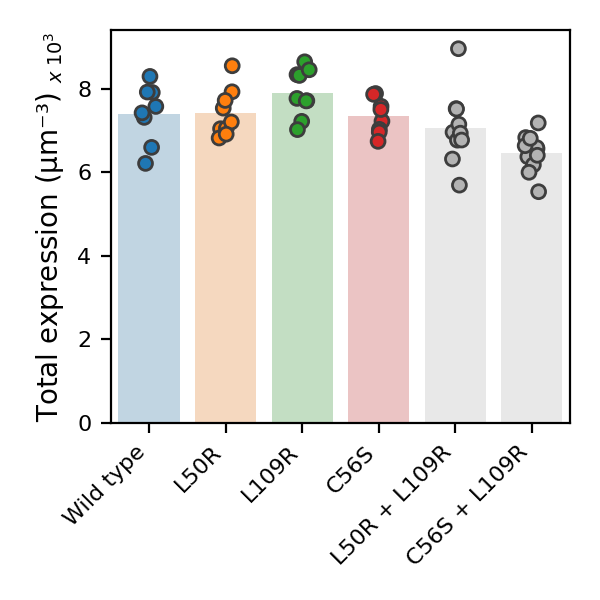

In [7]:
fig, ax = plt.subplots()
sns.stripplot(data=df, x='Genotype', y='Total', order=order3, linewidth=1, palette=palette)
sns.barplot(data=df, x='Genotype', y='Total', order=order3, alpha=0.3, errwidth=0, palette=palette)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

ax.set_xlabel('')
ax.set_ylabel('Total expression (μm⁻³) ' + r'$_{x\;10^3}$')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/dosages.png', dpi=600, transparent=True)

### Images

<IPython.core.display.Javascript object>


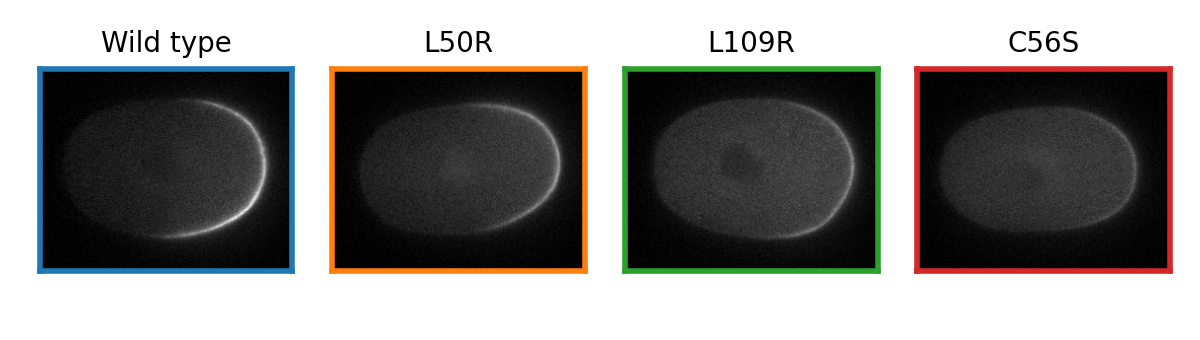

In [13]:
def func(path, ax, title, c):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=30000)
    ax.set_xticks([])
    ax.set_yticks([])
    [s.set_edgecolor(c) for s in ax.spines.values()]
    [s.set_linewidth(2) for s in ax.spines.values()]    
    ax.set_title(title, fontsize=10)

fig, ax = plt.subplots(1, 4)
func(df[df.Genotype == 'Wild type'].Path.iloc[0], ax[0], 'Wild type', 'tab:blue')
func(df[df.Genotype == 'L50R'].Path.iloc[0], ax[1], 'L50R', 'tab:orange')
func(df[df.Genotype == 'L109R'].Path.iloc[0], ax[2], 'L109R', 'tab:green')
func(df[df.Genotype == 'C56S'].Path.iloc[0], ax[3], 'C56S', 'tab:red')
fig.set_size_inches(6, 1.7)
fig.tight_layout()
fig.savefig('Figs/imgs.png', dpi=600, transparent=True)

### C56S cis acting - affinities

<IPython.core.display.Javascript object>


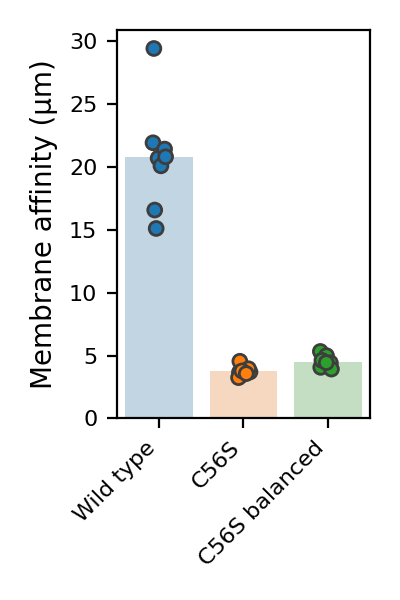

In [9]:
fig, ax = plt.subplots()
order4 = ['Wild type', 'C56S', 'C56S bal']
sns.stripplot(data=df, x='Genotype', y ='Ratio', order=order4, linewidth=1)
sns.barplot(data=df, x='Genotype', y ='Ratio', order=order4, alpha=0.3, errwidth=0)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

ax.set_xticklabels(['Wild type', 'C56S', 'C56S balanced'])
ax.set_xlabel('')
ax.set_ylabel('Membrane affinity (μm)')
ax.tick_params(axis='both', labelsize=8)
ax.set_ylim(bottom=0)
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/affinities_c56s_cis.png', dpi=600, transparent=True)

### C56S cis acting - images

In [10]:
# def func(path, ax, title):
#     img = load_image(path + '/af_corrected.tif')
#     roi = np.loadtxt(path + '/ROI.txt')
#     rotated = rotated_embryo(img, roi, 250, 200, 3)
#     ax.imshow(rotated, cmap='viridis', vmin=0, vmax=30000)
#     ax.axis('off')
#     ax.set_title(title, fontsize=10)

# fig, ax = plt.subplots(3, 1)
# func(df[df.Genotype == 'Wild type'].Path.iloc[0], ax[0], None)
# func(df[df.Genotype == 'C56S'].Path.iloc[0], ax[1], None)
# func(df[df.Genotype == 'C56S bal'].Path.iloc[0], ax[2], None)
# fig.set_size_inches(2, 4)
# fig.tight_layout()
# # fig.savefig('Figs/imgs.png', dpi=600, transparent=True)